### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

### Load & Read Data

In [2]:
df=pd.read_excel('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\data-for-time-series\\CatFishSales.xlsx', parse_dates=[0], index_col=0, squeeze=True)
df.head()

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
Name: Total, dtype: int64

In [3]:
df.shape

(324,)

In [4]:
df.size

324

In [5]:
df.dtypes

dtype('int64')

In [6]:
df.describe()

count      324.000000
mean     19643.984568
std       5039.324331
min       8196.000000
25%      15764.000000
50%      19660.500000
75%      23604.500000
max      30485.000000
Name: Total, dtype: float64

#### Missing values

In [7]:
df.isna().sum()

0

* NO missing values.

### Plot Time Series

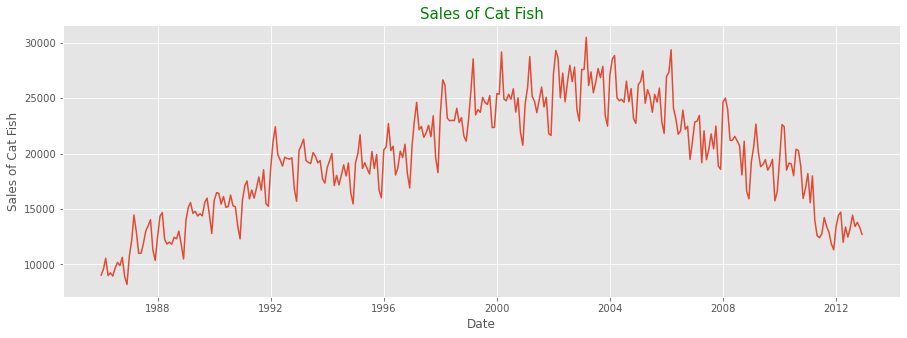

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales of Cat Fish", fontsize=12)
plt.title("Sales of Cat Fish", fontsize=15, color='green');

#### Lets choose 4 years data for building time series model

In [9]:
start_date=datetime(1996,1,1)
end_date=datetime(2000,1,1)
data=df[start_date:end_date]
data.head()

Date
1996-01-01    20322
1996-02-01    20613
1996-03-01    22704
1996-04-01    20276
1996-05-01    20669
Name: Total, dtype: int64

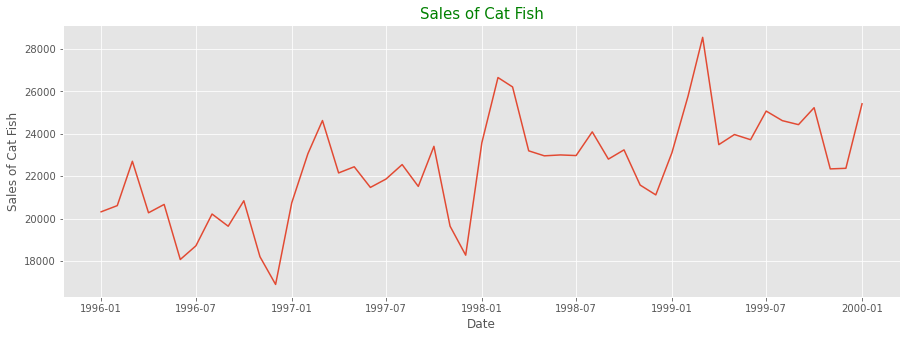

In [10]:
plt.figure(figsize=(15,5))
plt.plot(data)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales of Cat Fish", fontsize=12)
plt.title("Sales of Cat Fish", fontsize=15, color='green');

From graph there is a upward trend.

### Remove Trend

In [11]:
first_diff=data.diff()[1:]
first_diff

Date
1996-02-01     291.0
1996-03-01    2091.0
1996-04-01   -2428.0
1996-05-01     393.0
1996-06-01   -2595.0
1996-07-01     645.0
1996-08-01    1498.0
1996-09-01    -575.0
1996-10-01    1200.0
1996-11-01   -2638.0
1996-12-01   -1306.0
1997-01-01    3848.0
1997-02-01    2312.0
1997-03-01    1566.0
1997-04-01   -2470.0
1997-05-01     290.0
1997-06-01    -973.0
1997-07-01     395.0
1997-08-01     682.0
1997-09-01   -1030.0
1997-10-01    1890.0
1997-11-01   -3763.0
1997-12-01   -1367.0
1998-01-01    5298.0
1998-02-01    3074.0
1998-03-01    -443.0
1998-04-01   -3012.0
1998-05-01    -235.0
1998-06-01      42.0
1998-07-01     -29.0
1998-08-01    1116.0
1998-09-01   -1284.0
1998-10-01     436.0
1998-11-01   -1660.0
1998-12-01    -462.0
1999-01-01    1988.0
1999-02-01    2673.0
1999-03-01    2764.0
1999-04-01   -5056.0
1999-05-01     476.0
1999-06-01    -244.0
1999-07-01    1349.0
1999-08-01    -451.0
1999-09-01    -188.0
1999-10-01     799.0
1999-11-01   -2885.0
1999-12-01      28.0
2000-01-

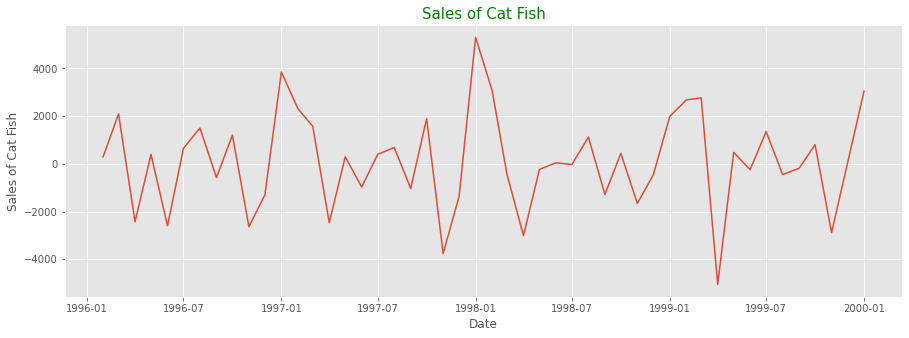

In [12]:
plt.figure(figsize=(15,5))
plt.plot(first_diff)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales of Cat Fish", fontsize=12)
plt.title("Sales of Cat Fish", fontsize=15, color='green');

Trend is removed, Seasonality is still present.. we are dealing with SARIMA so leave the seasonality as it is.

#### Plot ACF & PACF

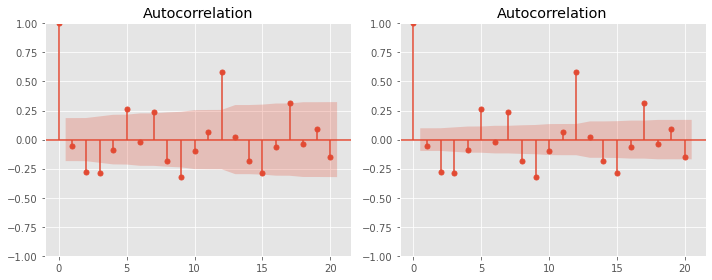

In [13]:
import statsmodels.tsa.api as smt
fig,axes=plt.subplots(1,2,sharex=False,sharey=False)
fig.set_figwidth(10)
fig.set_figheight(4)
smt.graphics.plot_acf(first_diff, lags=20, ax=axes[0], alpha=0.2) # Autocorelation
smt.graphics.plot_acf(first_diff, lags=20, ax=axes[1], alpha=0.5) # Partial-Autocorelation
plt.tight_layout()

#### Training & Testing Set

In [14]:
tr_end=datetime(1999,7,1)
ts_end=datetime(2000,1,1)

train=data[:tr_end]
test=data[tr_end+timedelta(days=1):ts_end]
print(train.shape, test.shape)

(43,) (6,)


#### Build SARIMA Model & Fit

In [15]:
model=SARIMAX(train, order=(0,1,0), seasonal_order=(1,0,1,12))
model=model.fit()
print(model.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                Total   No. Observations:                   43
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -365.810
Date:                              Tue, 20 Dec 2022   AIC                            737.620
Time:                                      11:06:10   BIC                            742.833
Sample:                                  01-01-1996   HQIC                           739.531
                                       - 07-01-1999                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8135      0.145      5.604      0.000       0.529       1.098
ma.S.L12      -0.51

#### Prediction

In [16]:
pred=model.forecast(len(test))
pred=pd.Series(pred, index=test.index)
res=test - pred # residuals
pred

Date
1999-08-01    25674.765346
1999-09-01    25052.654536
1999-10-01    25619.867597
1999-11-01    24222.646857
1999-12-01    23723.377395
2000-01-01    26224.000345
Name: predicted_mean, dtype: float64

In [17]:
test

Date
1999-08-01    24618
1999-09-01    24430
1999-10-01    25229
1999-11-01    22344
1999-12-01    22372
2000-01-01    25412
Name: Total, dtype: int64

In [18]:
#MSE, RMSE, MAPE
print("MSE:",np.mean((pred-test)**2))
print("RMSE:", np.sqrt(np.mean((pred-test)**2)))
print('MAPE:', round(np.mean(abs(res/test)),4))

MSE: 1278684.7636239447
RMSE: 1130.7894426567418
MAPE: 0.0434


### Plot the Residuals

Text(0.5, 1.0, 'Residuals from SARIMA Model')

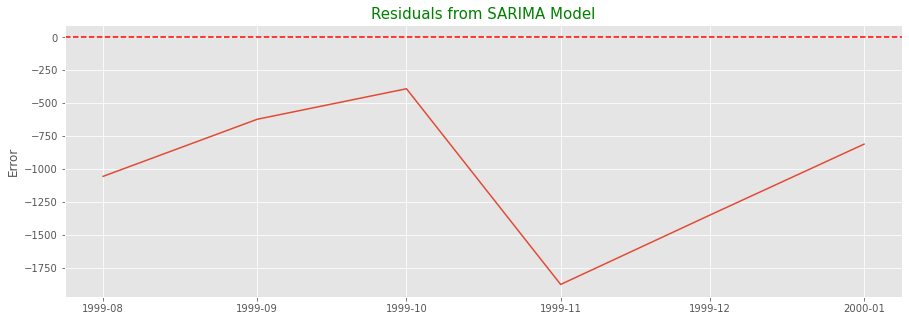

In [19]:
plt.figure(figsize=(15,5))
plt.plot(res)
plt.axhline(0, linestyle='--', color='red')
plt.ylabel('Error', fontsize=12)
plt.title('Residuals from SARIMA Model', fontsize=15, color='green')

Residuals are Negative.

### Plot The Actual  & Predictions.

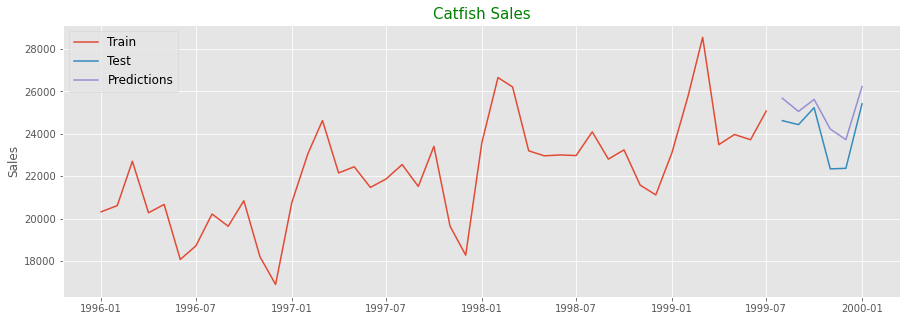

In [20]:
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)
plt.plot(pred)
plt.ylabel('Sales', fontsize=12)
plt.legend(('Train', 'Test', 'Predictions'), fontsize=12)
plt.title('Catfish Sales', fontsize=15, color='green');

### Using Rolling Forecast

In [21]:
roll_pred = test.copy()
for tr_end in test.index:
    train = data[:tr_end-timedelta(days=1)]
    model = SARIMAX(train, order=(0,1,0), seasonal_order=(1,0,1,12))
    model = model.fit()
    pred = model.forecast()
    roll_pred[tr_end] = pred

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

In [22]:
# rolling method residuals
roll_res = test - roll_pred

In [23]:
roll_pred

Date
1999-08-01    25674
1999-09-01    23978
1999-10-01    25016
1999-11-01    23772
1999-12-01    21799
2000-01-01    25094
Name: Total, dtype: int64

In [24]:
test

Date
1999-08-01    24618
1999-09-01    24430
1999-10-01    25229
1999-11-01    22344
1999-12-01    22372
2000-01-01    25412
Name: Total, dtype: int64

In [25]:
#MSE, RMSE, MAPE
print("MSE:",np.mean((roll_pred-test)**2))
print("RMSE:", np.sqrt(np.mean((roll_pred-test)**2)))
print('MAPE:', round(np.mean(abs(roll_res/test)),4))

MSE: 638907.6666666666
RMSE: 799.3170001111365
MAPE: 0.0286


* RMSE is better than Previous Model.

### Plot Residuals

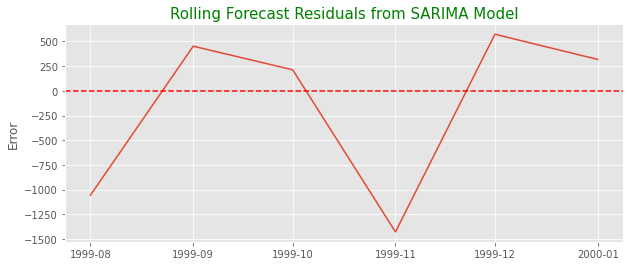

In [26]:
plt.figure(figsize=(10,4))
plt.plot(roll_res)
plt.axhline(0, linestyle='--', color='red')
plt.ylabel('Error', fontsize=12)
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=15, color='green');

### Plot Actual & Prediction from rolling model

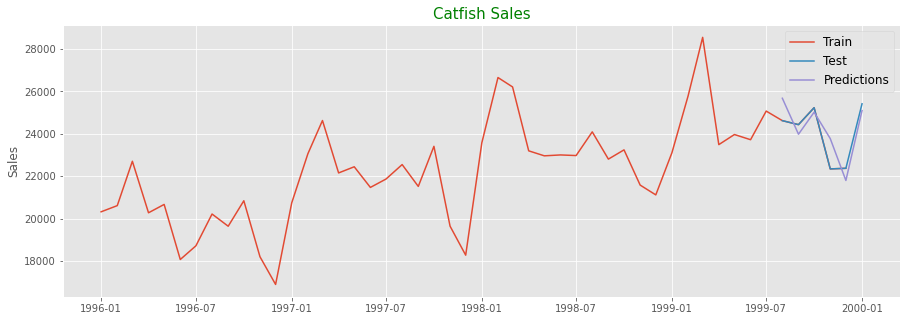

In [27]:
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)
plt.plot(roll_pred)
plt.ylabel('Sales', fontsize=12);
plt.legend(('Train','Test','Predictions'), fontsize=12)
plt.title('Catfish Sales', fontsize=15, color='green');